# Aplicando Python para análisis de precios: descarga, manejo y análisis de datos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> En esta y en las siguientes dos clases veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos (en esta clase) como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace menos de una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [1]:
# Importar el modulo data del paquete pandas_datareader. La comunidad lo importa con el nombre de web
import pandas as pd
import pandas_datareader.data as web

In [2]:
# Librerías estándar para arreglos y gráficos
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

Primero importaremos datos desde un archivo con extensión `.csv`

In [5]:
#Importar datos de un archivo csv
archivo='FB.csv'
data=pd.read_csv(archivo)
data['Adj Close']

0        78.449997
1        77.190002
2        76.150002
3        76.150002
4        78.180000
5        77.739998
6        76.720001
7        76.449997
8        76.279999
9        74.050003
10       75.180000
11       76.239998
12       76.739998
13       77.650002
14       77.830002
15       77.500000
16       75.779999
17       76.239998
18       78.000000
19       75.910004
20       74.989998
21       75.400002
22       75.629997
23       75.610001
24       74.470001
25       74.440002
26       75.190002
27       76.510002
28       76.230003
29       75.739998
           ...    
976     143.850006
977     139.529999
978     131.550003
979     132.429993
980     134.820007
981     131.729996
982     136.380005
983     135.000000
984     136.759995
985     138.679993
986     140.610001
987     141.089996
988     137.929993
989     139.630005
990     137.419998
991     141.850006
992     142.080002
993     144.500000
994     145.009995
995     144.059998
996     140.190002
997     143.

In [6]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000
5,2015-01-09,78.199997,78.620003,77.199997,77.739998,77.739998,21157000
6,2015-01-12,77.839996,78.000000,76.209999,76.720001,76.720001,19190200
7,2015-01-13,77.230003,78.080002,75.849998,76.449997,76.449997,25179600
8,2015-01-14,76.419998,77.199997,76.029999,76.279999,76.279999,25741000
9,2015-01-15,76.400002,76.570000,73.540001,74.050003,74.050003,34134000


Ahora lo haremos desde Yahoo Finance

In [7]:
web.DataReader?

In [8]:
data=web.DataReader('FB','yahoo','2015-01-02','2018-12-31')
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,78.930000,77.699997,78.580002,78.449997,18177500,78.449997
2015-01-05,79.250000,76.860001,77.980003,77.190002,26452200,77.190002
2015-01-06,77.589996,75.360001,77.230003,76.150002,27399300,76.150002
2015-01-07,77.360001,75.820000,76.760002,76.150002,22045300,76.150002
2015-01-08,78.230003,76.080002,76.739998,78.180000,23961000,78.180000
2015-01-09,78.620003,77.199997,78.199997,77.739998,21157000,77.739998
2015-01-12,78.000000,76.209999,77.839996,76.720001,19190200,76.720001
2015-01-13,78.080002,75.849998,77.230003,76.449997,25179600,76.449997
2015-01-14,77.199997,76.029999,76.419998,76.279999,25918600,76.279999


In [10]:
# Escribir una función para generalizar la exportación desde Yahoo
def get_closes(names,start,end):
    datos=web.DataReader(names,'yahoo',start,end)
    return datos['Adj Close']

In [11]:
# Instrumentos a descargar 
names=['NFLX','TSLA','AAPL'] #NFLX=Netflix, TSLA=Tesla, AAPL=Aple
start='2015-01-01'
end='2019-12-31'
data=get_closes(names,start,end)
data

Symbols,AAPL,NFLX,TSLA
Date,,,
2015-01-02,100.216454,49.848572,219.309998
2015-01-05,97.393181,47.311428,210.089996
2015-01-06,97.402374,46.501427,211.279999
2015-01-07,98.768150,46.742859,210.949997
2015-01-08,102.563072,47.779999,210.619995
2015-01-09,102.673050,47.041428,206.660004
2015-01-12,100.143120,45.547142,202.210007
2015-01-13,101.032280,46.255714,204.250000
2015-01-14,100.647285,46.320000,192.690002


#### La api de yahoo es inestable. Puede ser que nos toque intentar varias veces antes de tener éxito

In [ ]:
# Obtenemos los precios ajustados en el cierre


¿Cómo lucen estos datos?

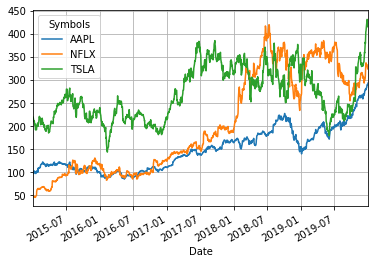

In [14]:
# Graficar
data.plot(grid=True)

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [17]:
# Método describe
data.describe()

Symbols,AAPL,NFLX,TSLA
count,1258.000000,1258.000000,1258.000000
mean,149.094641,201.427671,268.918879
std,45.932973,107.758693,56.139767
min,85.192909,45.547142,143.669998
25%,108.082399,101.480001,220.862503
50%,145.557358,162.064995,257.774994
75%,182.013893,310.385010,316.677490
max,292.954712,418.970001,430.940002


In [20]:
data.mean(),data.std()

(Symbols
 AAPL    149.094641
 NFLX    201.427671
 TSLA    268.918879
 dtype: float64, Symbols
 AAPL     45.932973
 NFLX    107.758693
 TSLA     56.139767
 dtype: float64)

## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [21]:
# Método shift
data.shift()

Symbols,AAPL,NFLX,TSLA
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,100.216454,49.848572,219.309998
2015-01-06,97.393181,47.311428,210.089996
2015-01-07,97.402374,46.501427,211.279999
2015-01-08,98.768150,46.742859,210.949997
2015-01-09,102.563072,47.779999,210.619995
2015-01-12,102.673050,47.041428,206.660004
2015-01-13,100.143120,45.547142,202.210007
2015-01-14,101.032280,46.255714,204.250000


In [24]:
# Entonces los rendimientos se calculan como
ret=((data-data.shift())/data.shift()).dropna()
ret

Symbols,AAPL,NFLX,TSLA
Date,,,
2015-01-05,-0.028172,-0.050897,-0.042041
2015-01-06,0.000094,-0.017121,0.005664
2015-01-07,0.014022,0.005192,-0.001562
2015-01-08,0.038423,0.022188,-0.001564
2015-01-09,0.001072,-0.015458,-0.018802
2015-01-12,-0.024641,-0.031765,-0.021533
2015-01-13,0.008879,0.015557,0.010088
2015-01-14,-0.003811,0.001390,-0.056597
2015-01-15,-0.027140,-0.001480,-0.004256


In [29]:
data.pct_change?

In [31]:
# Método pct_change
ret=data.pct_change().dropna()
ret

Symbols,AAPL,NFLX,TSLA
Date,,,
2015-01-05,-0.028172,-0.050897,-0.042041
2015-01-06,0.000094,-0.017121,0.005664
2015-01-07,0.014022,0.005192,-0.001562
2015-01-08,0.038423,0.022188,-0.001564
2015-01-09,0.001072,-0.015458,-0.018802
2015-01-12,-0.024641,-0.031765,-0.021533
2015-01-13,0.008879,0.015557,0.010088
2015-01-14,-0.003811,0.001390,-0.056597
2015-01-15,-0.027140,-0.001480,-0.004256


y la gráfica de los rendimientos se puede obtener como...

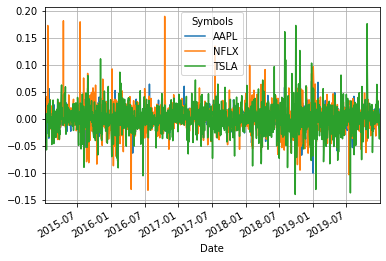

In [32]:
# Gráfica
ret.plot(grid=True)

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

**Esta ecuación sólo es válida cuando se tienen periodos cortos de tiempo**
Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [33]:
# Rendimiento logarítmico
retlog=np.log(data/data.shift()).dropna()
retlog

Symbols,AAPL,NFLX,TSLA
Date,,,
2015-01-05,-0.028576,-0.052238,-0.042950
2015-01-06,0.000094,-0.017269,0.005648
2015-01-07,0.013925,0.005178,-0.001563
2015-01-08,0.037703,0.021946,-0.001566
2015-01-09,0.001072,-0.015578,-0.018981
2015-01-12,-0.024949,-0.032281,-0.021768
2015-01-13,0.008840,0.015437,0.010038
2015-01-14,-0.003818,0.001389,-0.058262
2015-01-15,-0.027516,-0.001482,-0.004265


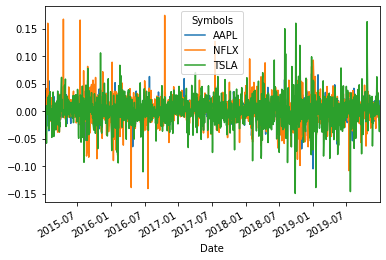

In [34]:
# Gráfica
retlog.plot()

In [35]:
# Valor absoluto de la diferencia
dif=np.abs(ret-retlog)
dif

Symbols,AAPL,NFLX,TSLA
Date,,,
2015-01-05,4.044376e-04,1.340952e-03,9.092973e-04
2015-01-06,4.454919e-09,1.482525e-04,1.598155e-05
2015-01-07,9.739881e-05,1.343160e-05,1.221064e-06
2015-01-08,7.197663e-04,2.425764e-04,1.224889e-06
2015-01-09,5.744961e-07,1.207166e-04,1.789971e-04
2015-01-12,3.086616e-04,5.154628e-04,2.352164e-04
2015-01-13,3.918560e-05,1.197680e-04,5.054911e-05
2015-01-14,7.278867e-06,9.648507e-07,1.664746e-03
2015-01-15,3.751047e-04,1.096903e-06,9.080744e-06


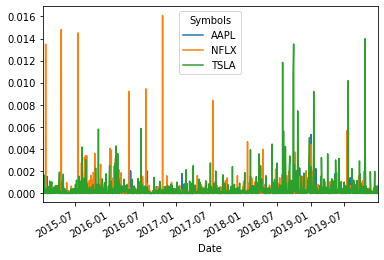

In [36]:
dif.plot()

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

In [38]:
# Media y volatilidad de rendimientos
ret.mean()

Symbols
AAPL    0.000976
NFLX    0.001829
TSLA    0.000913
dtype: float64

In [39]:
ret.std()

Symbols
AAPL    0.015646
NFLX    0.026253
TSLA    0.028312
dtype: float64

In [40]:
retlog.mean()

Symbols
AAPL    0.000853
NFLX    0.001488
TSLA    0.000514
dtype: float64

In [41]:
retlog.std()

Symbols
AAPL    0.015672
NFLX    0.025995
TSLA    0.028248
dtype: float64

___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde un archivo local ó fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario normal.

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.